In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Bernoulli Distribution

## Density Function

$$f(x | p) = p^x (1 - p)^{(1 - x)}$$

where $x \in \{0, 1\}$ and $p \in [0, 1]$.

For numerical accuracy reasons, density functions are often calculated on the log scale. So the above density function becomes

$$\log{f(x | p)} = x * \log{p} + (1 - x) * \log{1 - p}$$

Don't forget to exponentiate this to get it back to the original scale.

In [2]:
def bernoulli_density(x, p):
    return np.exp(x * np.log(p) + (1 - x) * np.log1p(-p))

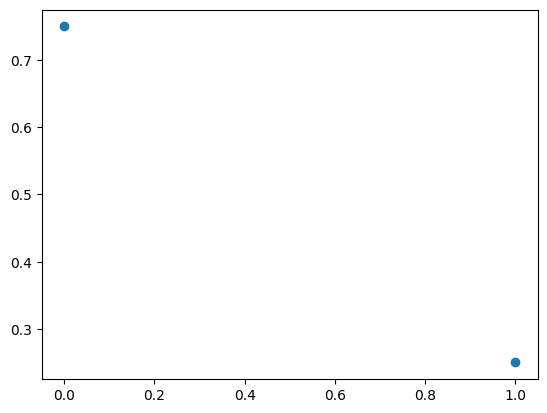

In [3]:
p = 0.25
x = np.array([0, 1])
y = bernoulli_density(x, p)
plt.scatter(x, y)

In [29]:
rng = np.random.default_rng()
N = 100
b = rng.binomial(1, p, size = N)
np.mean(b)

0.29

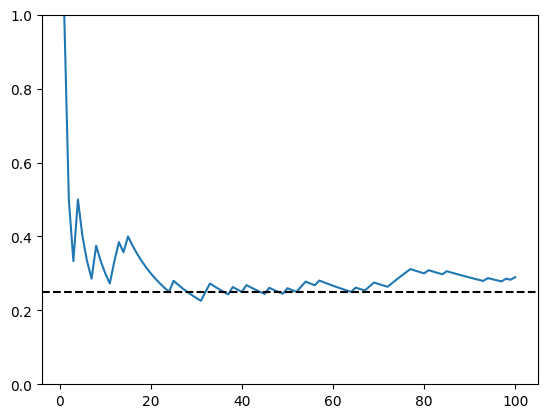

In [30]:
bdx = np.arange(N) + 1
cm = np.cumsum(b) / bdx
plt.plot(bdx, cm)
plt.ylim([0, 1])
plt.axhline(p, linestyle = "--", color = "black");

The plot above is depicting the fact that means converge in probability to expectations.  In math, we'd write

$$\lim_{N\to\infty} \frac{1}{N} \sum_{n=1}^N x_n = \mathbb{E}[X]$$

where each $x_n$ is a new data point from the distribution represented by $X$.

## Cumulative Distribution Function

In [ ]:
def bernoulli_cumulative_distribution(x, p):
    xf = int(np.clip(np.floor(x), -np.inf, 1)) # this line needs attention for HW 3
    out = 0.0
    sdx = np.arange(xf + 1)
    for s in sdx:
        out += bernoulli_density(s, p)
    return out
bernoulli_cumulative_distribution(3.99999999, p)

In math, the cumulative distribution function is a particular expectation

$$F(x) = \mathbb{E}[1_{(-\infty, x]}(X)]$$

In [39]:
def bernoulli_empirical_distribution(x, data):
    return np.mean(data <= x)

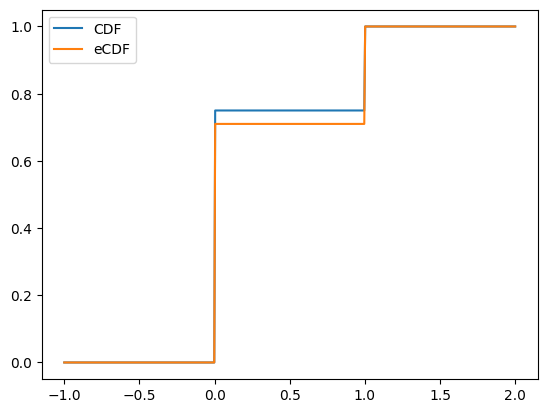

In [43]:
x = np.linspace(-1, 2, 500)
Fx = [bernoulli_cumulative_distribution(xn, p) for xn in x]

Fhatx = [bernoulli_empirical_distribution(xn, b) for xn in x]

plt.plot(x, Fx, label = "CDF")
plt.plot(x, Fhatx, label = "eCDF")
plt.legend();

The plot above depicts convergence in distribution.  As the number of data points increases, the empirical distribution function of the Bernoulli distribution (which depends only on data) converges to the cumulative distribution function of the Bernoulli distribution, for all values/arguments $x$ in the real line, $x \in \mathbb{R}$.

$$\lim_{N\to\infty} \hat{F}(x) = F(x)$$

for all $x \in \mathbb{R}$, where $\hat{F}(x)$ represents the empirical distribution function and $F(x)$ represents the cumulative distribution function.

There is nothing particular about the Bernoulli distribution for any of these different types of convergence.  So long as the thing on the right hand side of the equation exists, which $F(x)$ always does and $\mathbb{E}[X]$ mostly does (but sometimes doesn't), then the same theory applies to whatever the distribution.  More details on the types of convergence related to random variables is found on the Wikipedia page [Convergence of random variables](https://en.wikipedia.org/wiki/Convergence_of_random_variables).